In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. DATA

In [2]:
#Lets import the csv file in a Pandas DataFrame
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 1.1 Data Overview

In [3]:
#Shape of the DataFrame
df.shape

(7043, 21)

In [4]:
#Column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
#Non-nulls & data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
#Checking for nulls
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
#Checking for unique values of each columns
for item in df.columns:
    print('\n', item, ':', df[item].nunique(), '\n', df[item].unique())


 customerID : 7043 
 ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

 gender : 2 
 ['Female' 'Male']

 SeniorCitizen : 2 
 [0 1]

 Partner : 2 
 ['Yes' 'No']

 Dependents : 2 
 ['No' 'Yes']

 tenure : 73 
 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

 PhoneService : 2 
 ['No' 'Yes']

 MultipleLines : 3 
 ['No phone service' 'No' 'Yes']

 InternetService : 3 
 ['DSL' 'Fiber optic' 'No']

 OnlineSecurity : 3 
 ['No' 'Yes' 'No internet service']

 OnlineBackup : 3 
 ['Yes' 'No' 'No internet service']

 DeviceProtection : 3 
 ['No' 'Yes' 'No internet service']

 TechSupport : 3 
 ['No' 'Yes' 'No internet service']

 StreamingTV : 3 
 ['No' 'Yes' 'No internet service']

 StreamingMovies : 3 
 ['No' 'Yes' 'No internet service']

 Contract : 3 
 ['Month-to-month' 'One year' 'Tw

# 2. DATA MANIPULATION

In [8]:
#The column 'TotalCharges' have some rows with spaces ' '.
df[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


- Tenure for all these 11 rows is 0. Churn is "No". One can interpret this as belonging to all new customers, if indeed these are the only rows with tenure = 0 too. This is verified to be true below. Hence we can set TotalCharges to 0, whenever tenure is 0.


In [9]:
df[df['tenure'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
#Replacing the ' ' with 0.
df['TotalCharges'].replace(to_replace = ' ', value = 0, inplace = True)

In [11]:
#Now lets convert the column 'TotalCharges' to a numeric column
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [12]:
#Checking the data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [13]:
#Lets just remove the customerID column since it's of no use to us
df = df.iloc[:,1:]
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
#Lets just check how many churners and non-churners are present
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# 3. DATA STORY

### Note that,

Target (Dependent) Variable: Churn

Feature (Independent) Variables: 19 out of 20 shown above. Churn is our target.

We can divide predictor variables into:
   - Person specific : gender, SeniorCitizen,Partner, Dependents, tenure


   - Service specific :
      - Phone : PhoneService, MultipleLines      
      - Internet : InternetService, Online Security, Online backup, Streaming TV, Streaming Movies, Tech support, Device  protection


   - Money specific : Monthly Charges, TotalCharges, Contract, Paperlessbilling, Payment Method


### The questions to which we seek answers:

   - Is there a gender specific to churn?
   
   
   - Is there any person specific trends in churn?
   
   
   - Is there a correlation between tenure and churn?
   
   
   - Is there a correlation between certain type of services and churn?
   
   
   - Is there a correlation between different types of contract and churn?
   
   
   - Is there a correlation between paperless billing and churn?
   
   
   - Is there a correlation between different types of payment method and churn?
   
   
   - Is there a correlation between monthly charges and churn?
   
   
   - Is there a correlation between total charges and churn?
   
   
   - Is there a correlation between monthly charges and total charge with respect to churn?
   
   
   - Is there a correlation between monthly charges and tenure with respect to churn?
   
   
   - Is there a correlation between total charges and tenure with respect to churn?

## 3.1 Customer Churn in the data

### First let us check out the number of customers who have churned or not churned.

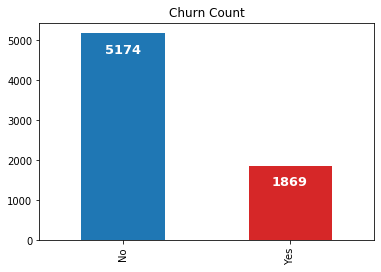

In [15]:
ax = df['Churn'].value_counts().plot(kind='bar', color=('tab:blue','tab:red'))
plt.title('Churn Count')
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height, 1)), (x + 0.14, y + height - 500), fontsize=13, color='white', weight='bold')

### Percent wise:

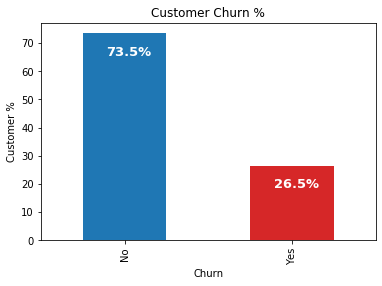

In [16]:
ax = (df['Churn'].value_counts()*100/len(df)).plot(kind='bar', color=('tab:blue','tab:red'))
plt.xlabel('Churn')
plt.ylabel('Customer %')
plt.title('Customer Churn %')
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height, 1))+'%', (x + 0.14, y + height - 8), fontsize=13, color='white', weight='bold')

#### So, we can see from above: 
   - Churn No - 73.5% or 5174 
   - Churn Yes - 26.5% or 1869

## 3.2 Gender distribution

### Let's see the the gender distribution in the dataset:

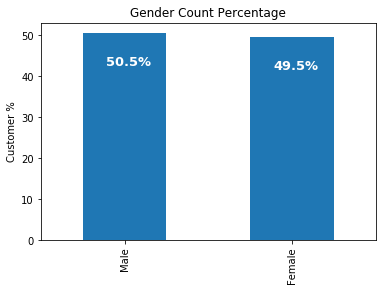

In [17]:
ax = (df['gender'].value_counts()*100/len(df)).plot(kind='bar')
plt.ylabel('Customer %')
plt.title('Gender Count Percentage')
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height, 1))+'%', (x + 0.14, y + height - 8), fontsize=13, color='white', weight='bold')

- We can see that the gender distribution looks balanced.

## 3.3 Visualizing the customer's attributes with respect to Churn

### 3.3.1. Person specific attributes:

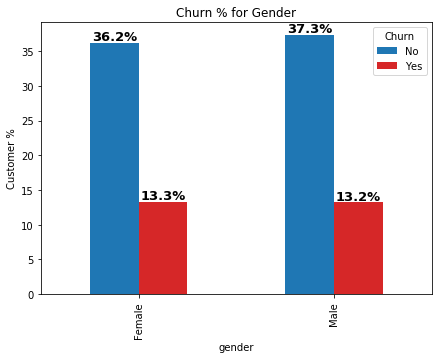

In [18]:
ax = (pd.crosstab(df.gender, df.Churn)*100/len(df)).plot(kind='bar', color=('tab:blue','tab:red'), figsize=(7,5))
plt.title('Churn % for Gender')
plt.ylabel('Customer %')
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height, 1))+'%', (x + 0.01, y + height + 0.4), fontsize=13, weight='bold')

- The churn rate is not affected by the gender.

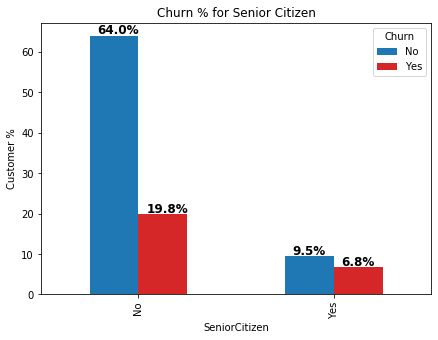

In [19]:
#Let us replace the values of the Senior Citizen column to Yes & No for now.
df['SeniorCitizen'].replace(to_replace = 0, value = 'No', inplace = True)
df['SeniorCitizen'].replace(to_replace = 1, value = 'Yes', inplace = True)

ax = (pd.crosstab(df.SeniorCitizen, df.Churn)*100/len(df)).plot(kind='bar', color=('tab:blue','tab:red'), figsize=(7,5))
plt.title('Churn % for Senior Citizen')
plt.ylabel('Customer %')
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height, 1))+'%', (x + 0.04, y + height + 0.5), fontsize=12, weight='bold')

- Senior Citizens tend to churn less compared to non-senior citizens.

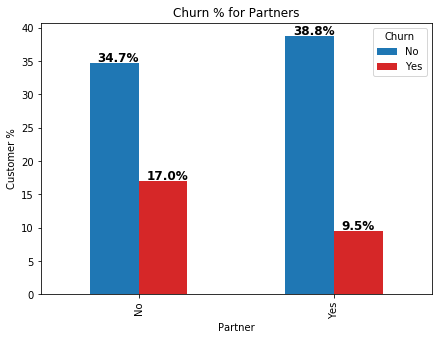

In [20]:
ax = (pd.crosstab(df.Partner,df.Churn)*100/len(df)).plot(kind='bar', color=('tab:blue','tab:red'), figsize=(7,5))
plt.title('Churn % for Partners')
plt.ylabel('Customer %')
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height, 1))+'%', (x + 0.04, y + height + 0.2), fontsize=12, weight='bold')

- Customers who don't have partners have higher churn rate.

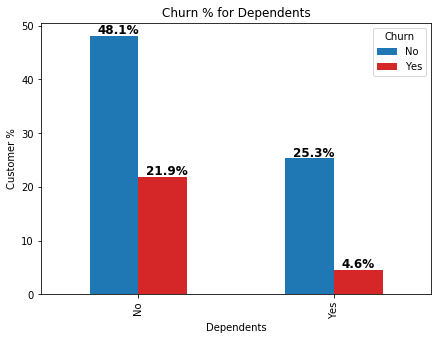

In [21]:
ax = (pd.crosstab(df.Dependents,df.Churn)*100/len(df)).plot(kind='bar', color=('tab:blue','tab:red'), figsize=(7,5))
plt.title('Churn % for Dependents')
plt.ylabel('Customer %')
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height, 1))+'%', (x + 0.04, y + height + 0.4), fontsize=12, weight='bold')

- Customers without dependents have higher churn rate.

Text(0, 0.5, 'Count')

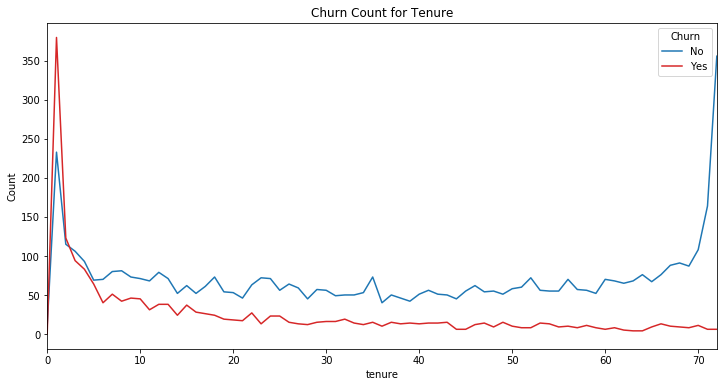

In [22]:
pd.crosstab(df.tenure,df.Churn).plot(color=('tab:blue','tab:red'), figsize=(12,6))
plt.title('Churn Count for Tenure')
plt.ylabel('Count')

- Churn count decreases as the tenure increases. 
- Customers tend to churn within the first few months or within a year.

#### Lets create 4 tenure groups to check the churn rate more clearly.

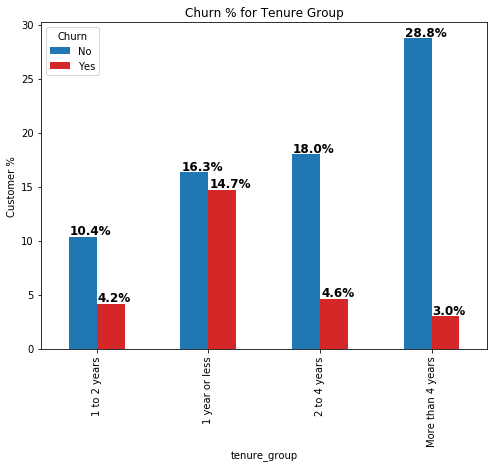

In [23]:
def tenure_grp(df) :  
    if df["tenure"] <= 12 :
        return "1 year or less"
    elif (df["tenure"] > 12) & (df["tenure"] <= 24 ):
        return "1 to 2 years"
    elif (df["tenure"] > 24) & (df["tenure"] <= 48):
        return "2 to 4 years"
    elif df["tenure"] > 48:
        return "More than 4 years"
df["tenure_group"] = df.apply(lambda df:tenure_grp(df), axis = 1)

#Now lets visualize it
ax = (pd.crosstab(df.tenure_group,df.Churn)*100/len(df)).plot(kind='bar', color=('tab:blue','tab:red'), figsize=(8,6))
plt.title('Churn % for Tenure Group')
plt.ylabel('Customer %')
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height, 1))+'%', (x + 0.01, y + height + 0.2), fontsize=12, weight='bold')

- Now we can clearly see that the churn rate is high in the 1st year.

### 3.3.2. Service specific attributes:

### Phone:

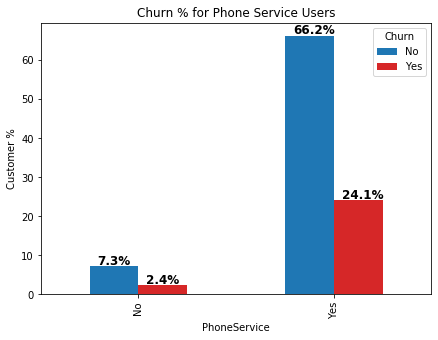

In [24]:
ax = (pd.crosstab(df.PhoneService,df.Churn)*100/len(df)).plot(kind='bar', color=('tab:blue','tab:red'), figsize=(7,5))
plt.title('Churn % for Phone Service Users')
plt.ylabel('Customer %')
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height, 1))+'%', (x + 0.04, y + height + 0.5), fontsize=12, weight='bold')

- Customers having phone service have higher churn rate.

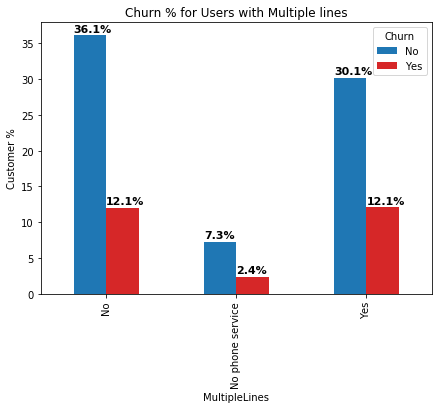

In [25]:
ax = (pd.crosstab(df.MultipleLines,df.Churn)*100/len(df)).plot(kind='bar', color=('tab:blue','tab:red'), figsize=(7,5))
plt.title('Churn % for Users with Multiple lines')
plt.ylabel('Customer %')
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height, 1))+'%', (x + 0.001, y + height + 0.5), fontsize=11, weight='bold')

- Customers having multiple lines or not does not affect the churn rate.
- Customers without phone service tend to churn less.

### Internet:

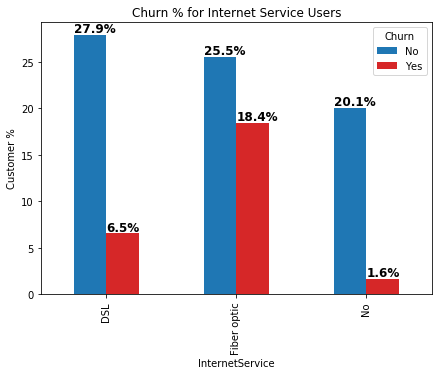

In [26]:
ax = (pd.crosstab(df.InternetService,df.Churn)*100/len(df)).plot(kind='bar', color=('tab:blue','tab:red'), figsize=(7,5))
plt.title('Churn % for Internet Service Users')
plt.ylabel('Customer %')
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height, 1))+'%', (x + 0.001, y + height + 0.3), fontsize=12, weight='bold')

- Customers with fiber optic connection have higher churn rate.

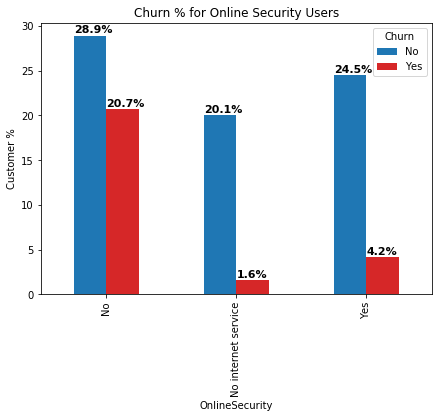

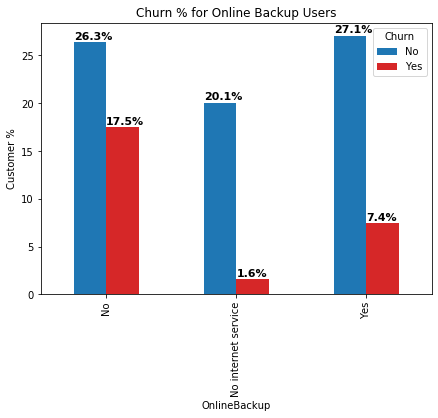

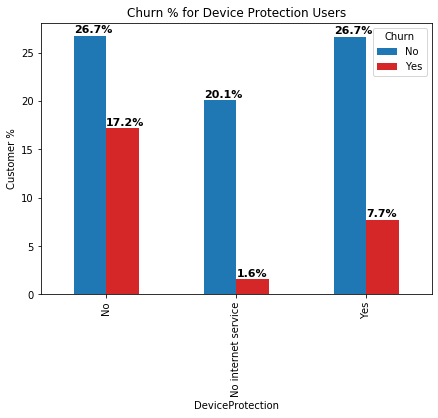

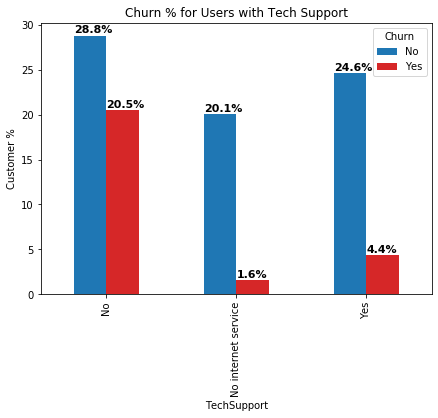

In [27]:
#Online Security
ax = (pd.crosstab(df.OnlineSecurity,df.Churn)*100/len(df)).plot(kind='bar', color=('tab:blue','tab:red'), figsize=(7,5))
plt.title('Churn % for Online Security Users')
plt.ylabel('Customer %')
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height, 1))+'%', (x + 0.001, y + height + 0.3), fontsize=11, weight='bold')
    
#Online Backup
ax = (pd.crosstab(df.OnlineBackup,df.Churn)*100/len(df)).plot(kind='bar', color=('tab:blue','tab:red'), figsize=(7,5))
plt.title('Churn % for Online Backup Users')
plt.ylabel('Customer %')
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height, 1))+'%', (x + 0.001, y + height + 0.3), fontsize=11, weight='bold')

#Device Protection
ax = (pd.crosstab(df.DeviceProtection,df.Churn)*100/len(df)).plot(kind='bar', color=('tab:blue','tab:red'), figsize=(7,5))
plt.title('Churn % for Device Protection Users')
plt.ylabel('Customer %')
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height, 1))+'%', (x + 0.001, y + height + 0.3), fontsize=11, weight='bold')

#Tech Support
ax = (pd.crosstab(df.TechSupport,df.Churn)*100/len(df)).plot(kind='bar', color=('tab:blue','tab:red'), figsize=(7,5))
plt.title('Churn % for Users with Tech Support')
plt.ylabel('Customer %')
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height, 1))+'%', (x + 0.001, y + height + 0.3), fontsize=11, weight='bold')

- Customers who do not have Online Security, Online Backup, Device Protection & Tech Support have higher churn rate.

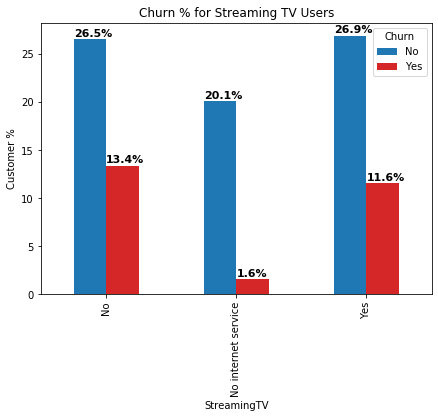

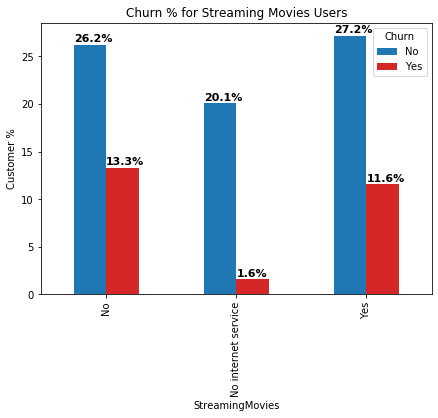

In [28]:
#Streaming TV
ax = (pd.crosstab(df.StreamingTV,df.Churn)*100/len(df)).plot(kind='bar', color=('tab:blue','tab:red'), figsize=(7,5))
plt.title('Churn % for Streaming TV Users')
plt.ylabel('Customer %')
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height, 1))+'%', (x + 0.001, y + height + 0.3), fontsize=11, weight='bold')
    
#Streaming Movies
ax = (pd.crosstab(df.StreamingMovies,df.Churn)*100/len(df)).plot(kind='bar', color=('tab:blue','tab:red'), figsize=(7,5))
plt.title('Churn % for Streaming Movies Users')
plt.ylabel('Customer %')
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height, 1))+'%', (x + 0.001, y + height + 0.3), fontsize=11, weight='bold')

- The churn rate do not have a big difference between the customers having the service of Streaming TV & Streaming Movies or not.

### 3.3.3 Money specific attributes:

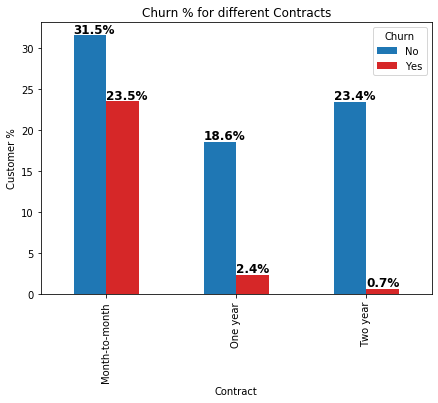

In [29]:
ax = (pd.crosstab(df.Contract,df.Churn)*100/len(df)).plot(kind='bar', color=('tab:blue','tab:red'), figsize=(7,5))
plt.title('Churn % for different Contracts')
plt.ylabel('Customer %')
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height, 1))+'%', (x + 0.001, y + height + 0.3), fontsize=12, weight='bold')

- Customers having Month-to-Month contracts have a high churn rate.

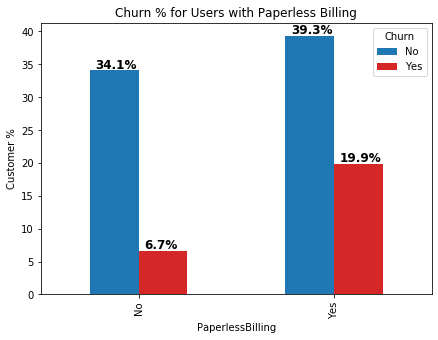

In [30]:
ax = (pd.crosstab(df.PaperlessBilling,df.Churn)*100/len(df)).plot(kind='bar', color=('tab:blue','tab:red'), figsize=(7,5))
plt.title('Churn % for Users with Paperless Billing')
plt.ylabel('Customer %')
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height, 1))+'%', (x + 0.03, y + height + 0.3), fontsize=12, weight='bold')

- Customers with paperless billing tend to churn out more.

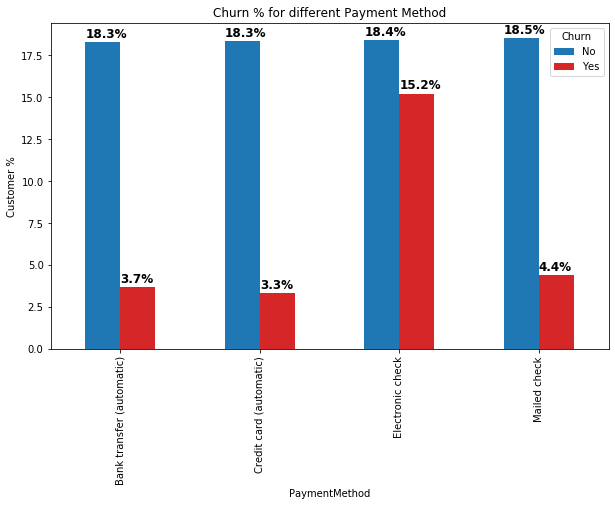

In [31]:
ax = (pd.crosstab(df.PaymentMethod,df.Churn)*100/len(df)).plot(kind='bar', color=('tab:blue','tab:red'), figsize=(10,6))
plt.title('Churn % for different Payment Method')
plt.ylabel('Customer %')
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height, 1))+'%', (x + 0.001, y + height + 0.3), fontsize=12, weight='bold')

- Customers who pay electronic check have a high churn rate.

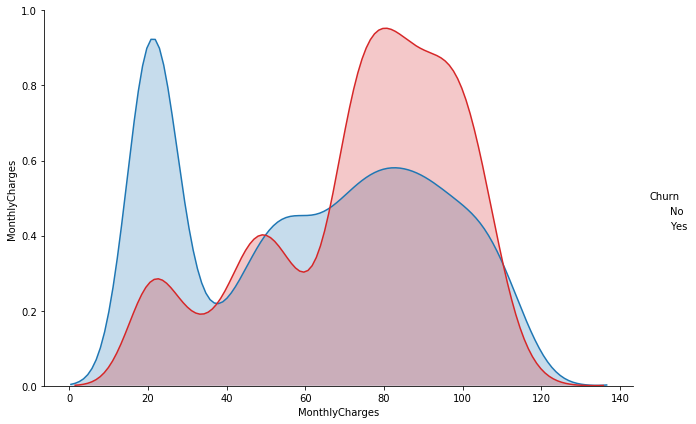

In [32]:
sns.pairplot(df, vars=['MonthlyCharges'], hue='Churn', palette=['tab:blue','tab:red'], height=6, aspect=1.5)

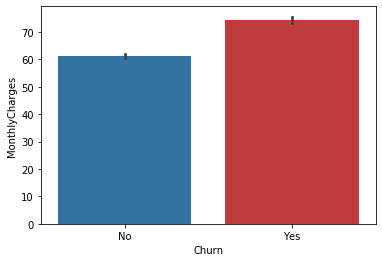

In [33]:
sns.barplot('Churn', 'MonthlyCharges', data=df, palette=['tab:blue','tab:red'])

- Churn rate increases as Monthly Charges increases.

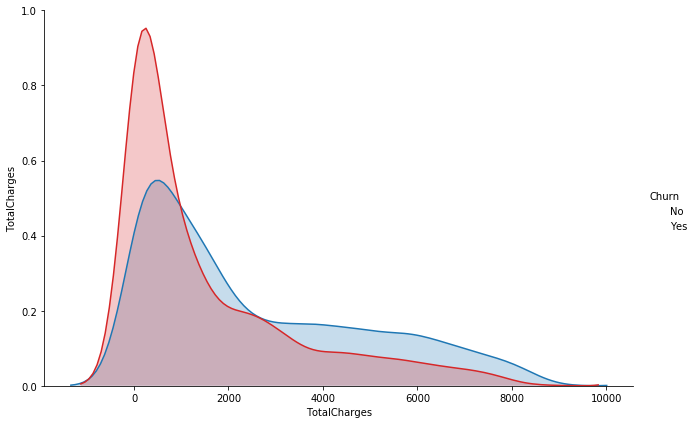

In [34]:
sns.pairplot(df, vars=['TotalCharges'], hue='Churn', palette=['tab:blue','tab:red'], height=6, aspect=1.5)

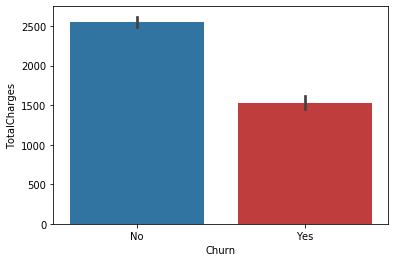

In [35]:
sns.barplot('Churn', 'TotalCharges', data=df, palette=['tab:blue','tab:red'])

- Churn rate decreases as Total Charges increases.

## 3.4 Relationship between the numeric columns with respect to Churn

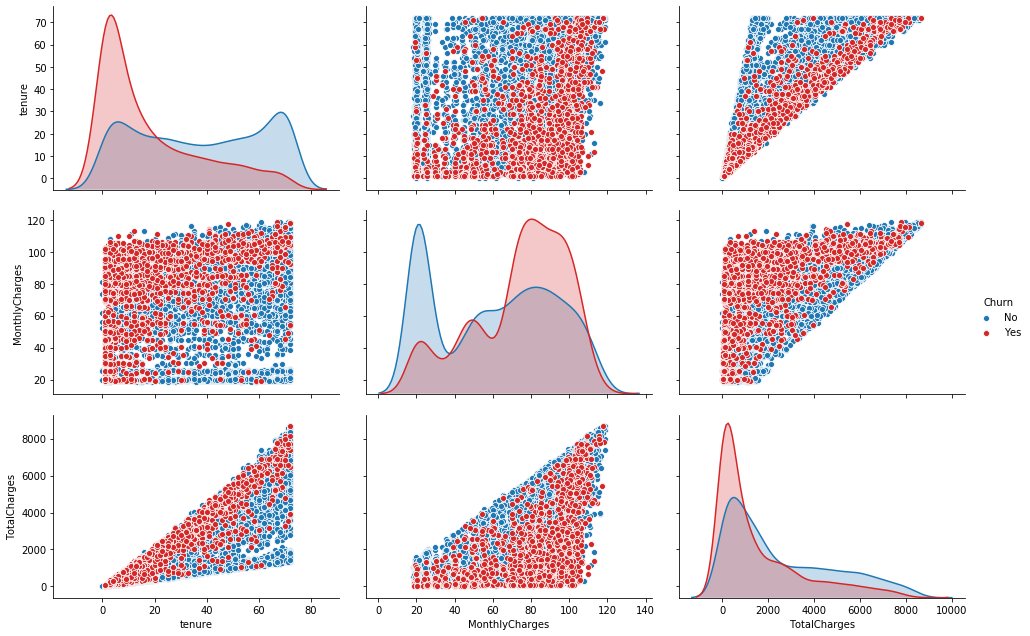

In [36]:
sns.pairplot(df, hue='Churn', palette=['tab:blue','tab:red'], height=3, aspect=1.5)

### 3.4.1 Monthly Charges and Total Charges by Churn

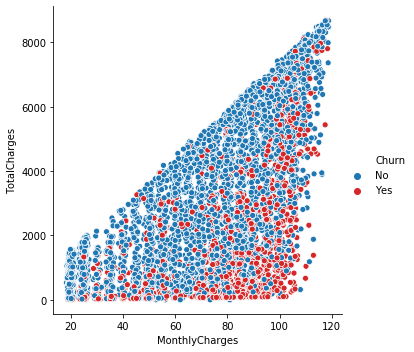

In [37]:
sns.relplot(x="MonthlyCharges", y='TotalCharges', hue='Churn', data=df, palette=['tab:blue','tab:red'])

- Total Charge increases as the Monthly Charge increases.
- Churn is mainly towards the bottom which indicates that churn increases with increase in monthly charge.

### 3.4.2 Monthly Charges and Tenure by Churn

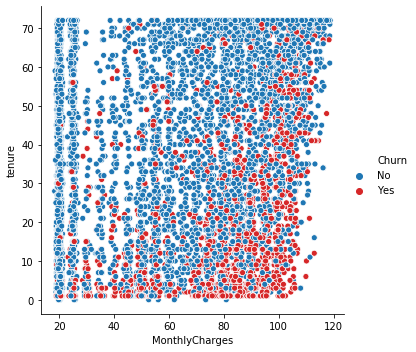

In [38]:
sns.relplot(x='MonthlyCharges', y='tenure', hue='Churn', data=df, palette=['tab:blue','tab:red'])

- Monthly charges may or may not increase with tenure.
- Again we can see that churn increases with increase in monthly charge.

### 3.4.3 Total Charges and Tenure by Churn

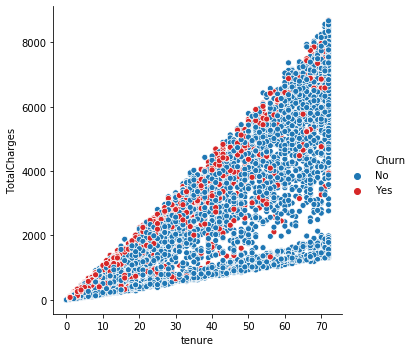

In [39]:
sns.relplot( x='tenure', y='TotalCharges', hue='Churn', data=df, palette=['tab:blue','tab:red'])

- Total charges increases with tenure.
- Churn rate does not increase so much with increase of either total charge or tenure.

### 3.4.4 Monthly Charges, Total Charges and Churn by Tenure groups

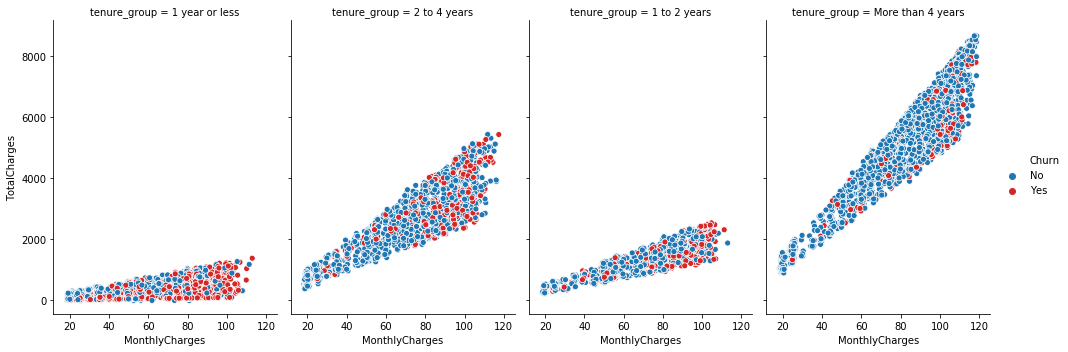

In [40]:
sns.relplot(x="MonthlyCharges", y='TotalCharges', hue='Churn', col='tenure_group', data=df, palette=['tab:blue','tab:red'], height=5, aspect=0.7)

- This clearly indicates that the churn rate is high within the 1st year and also it increases with monthly charge.